In [ ]:
# %% Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# %%

# Function to load and preprocess data
def load_and_preprocess_data(data_path):
    df = pd.read_csv(data_path)

    df = df.dropna(axis=1)
    
    df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    X = df_scaled.drop('diagnosis_M', axis=1)
    y = df_scaled['diagnosis_M']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
# %%

# Function to define and train a machine learning model pipeline
def train_model(model_name, X_train, y_train, hyperparameter_grid):
    model_dict = {
        'Logistic Regression': Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression())]),
        'Support Vector Machine': Pipeline([('scaler', MinMaxScaler()), ('model', SVC())]),
        'Decision Tree': Pipeline([('scaler', MinMaxScaler()), ('model', DecisionTreeClassifier())]),
        'Naive Bayes': Pipeline([('scaler', MinMaxScaler()), ('model', GaussianNB())]),
        'K-Nearest Neighbors': Pipeline([('scaler', MinMaxScaler()), ('model', KNeighborsClassifier())]),
        'Random Forest': Pipeline([('scaler', MinMaxScaler()), ('model', RandomForestClassifier())]),
        'Gradient Boosting': Pipeline([('scaler', MinMaxScaler()), ('model', GradientBoostingClassifier())]),
        'AdaBoost': Pipeline([('scaler', MinMaxScaler()), ('model', AdaBoostClassifier())]),
        'SGD Classifier': Pipeline([('scaler', MinMaxScaler()), ('model', SGDClassifier())])
    }

    model = model_dict[model_name].fit(X_train, y_train)

    # Grid search for hyperparameter tuning 
    if hyperparameter_grid is not None:
        grid_search = GridSearchCV(model, hyperparameter_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_

    return model

In [ ]:
# %%

# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred) if hasattr(model, 'predict_proba') else None
    r2 = r2_score(y_test, y_pred) if hasattr(model, 'predict_proba') else None

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nModel: {model}")

    if mse is not None and r2 is not None:
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R^2 Score: {r2:.4f}")

    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# %%

data_path = '/home/anis/Documents/Projects/myproject/Breast-Cancer-Diagnosis-with-Machine-Learning/Breast Cancer Wisconsin.csv'
X_train, X_test, y_train, y_test = load_and_preprocess_data(data_path)

In [ ]:
# %% Hyperparameter grids 

# Logistic Regression
logistic_regression_grid = {
    'model__C': [1.0],
    'model__max_iter': [100, 500, 1000],
    'model__multi_class': ['auto'],
    'model__solver': ['lbfgs']
}

# Support Vector Machine
svm_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'linear']
}

# Decision Tree
decision_tree_grid = {
    'model__max_depth': [None, 2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Naive Bayes
naive_bayes_grid = {
    'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# K-Nearest Neighbors
knn_grid = {
    'model__n_neighbors': [3, 5, 11, 19],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# Random Forest
random_forest_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 5, 10,],
    'model__min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gradient_boosting_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 1],
    'model__max_depth': [None, 2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# AdaBoost
adaboost_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__learning_rate': [0.01, 0.1, 1]
}

# SGD Classifier
sgd_grid = {
    'model__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [ ]:
# %%

# Train and evaluate models 


Model: Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])
Mean Squared Error: 0.0175
R^2 Score: 0.9253
Confusion Matrix:
[[71  0]
 [ 2 41]]
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1-Score: 0.9762


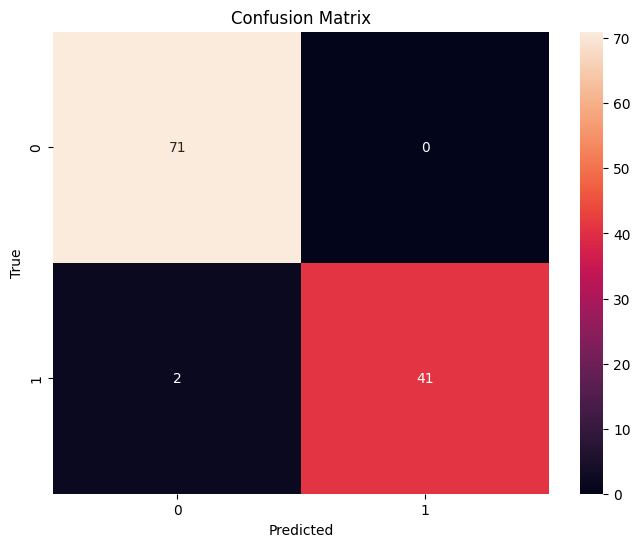

In [ ]:
# %% Logistic Regression

model = train_model('Logistic Regression', X_train, y_train, logistic_regression_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(C=1, gamma=1))])
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


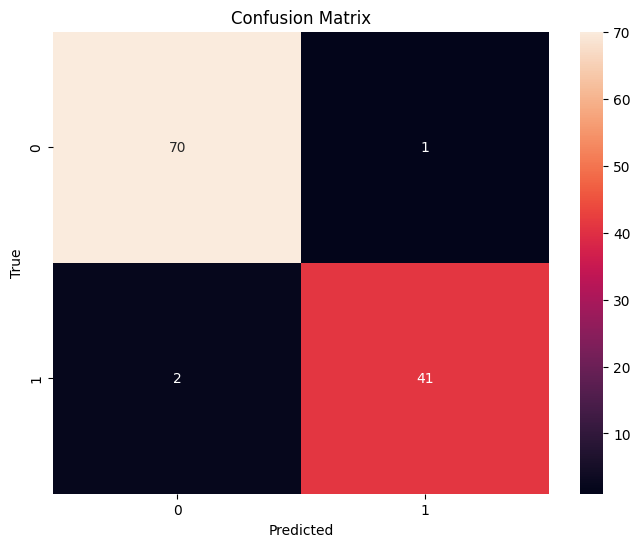

In [ ]:
# %% Support Vector Machine

model = train_model('Support Vector Machine', X_train, y_train, svm_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier(min_samples_leaf=2))])
Mean Squared Error: 0.0526
R^2 Score: 0.7760
Confusion Matrix:
[[69  2]
 [ 4 39]]
Accuracy: 0.9474
Precision: 0.9512
Recall: 0.9070
F1-Score: 0.9286


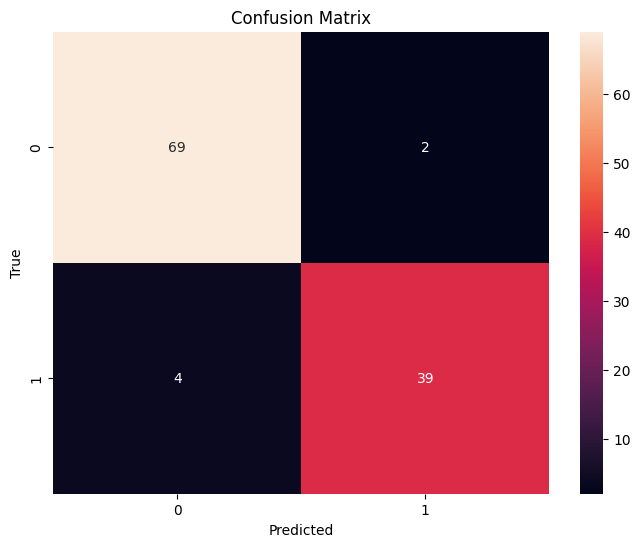

In [ ]:
# %% Decision Tree

model = train_model('Decision Tree', X_train, y_train, decision_tree_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()), ('model', GaussianNB())])
Mean Squared Error: 0.0351
R^2 Score: 0.8506
Confusion Matrix:
[[70  1]
 [ 3 40]]
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1-Score: 0.9524


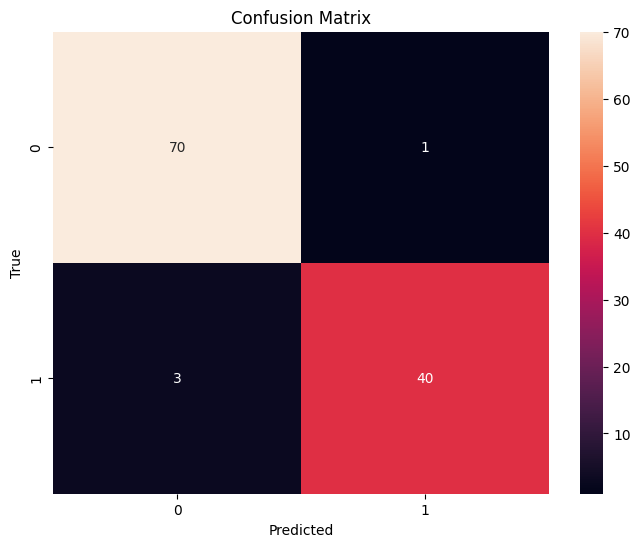

In [ ]:
# %% Naive Bayes

model = train_model('Naive Bayes', X_train, y_train, naive_bayes_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=19))])
Mean Squared Error: 0.0439
R^2 Score: 0.8133
Confusion Matrix:
[[69  2]
 [ 3 40]]
Accuracy: 0.9561
Precision: 0.9524
Recall: 0.9302
F1-Score: 0.9412


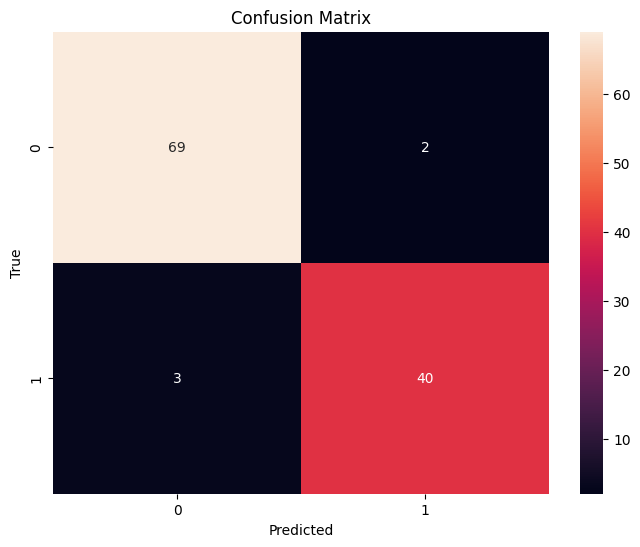

In [ ]:
# %% K-Nearest Neighbors

model = train_model('K-Nearest Neighbors', X_train, y_train, knn_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_features='log2',
                                        min_samples_split=5))])
Mean Squared Error: 0.0351
R^2 Score: 0.8506
Confusion Matrix:
[[70  1]
 [ 3 40]]
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1-Score: 0.9524


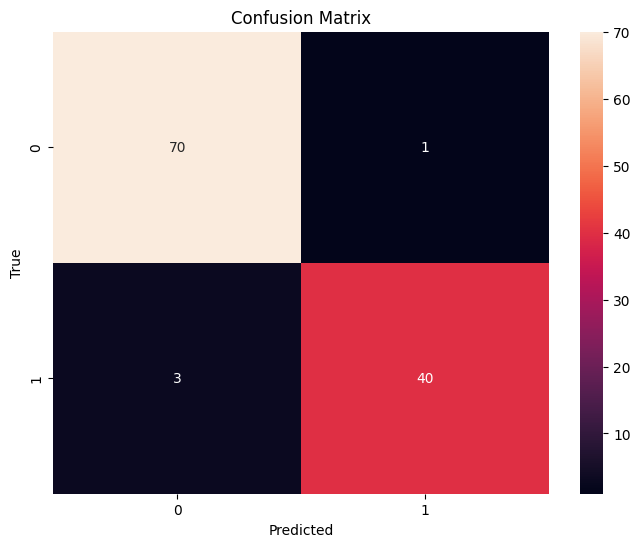

In [ ]:
# %% Random Forest

model = train_model('Random Forest', X_train, y_train, random_forest_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=1, max_depth=2,
                                            min_samples_leaf=4,
                                            n_estimators=200))])
Mean Squared Error: 0.0439
R^2 Score: 0.8133
Confusion Matrix:
[[69  2]
 [ 3 40]]
Accuracy: 0.9561
Precision: 0.9524
Recall: 0.9302
F1-Score: 0.9412


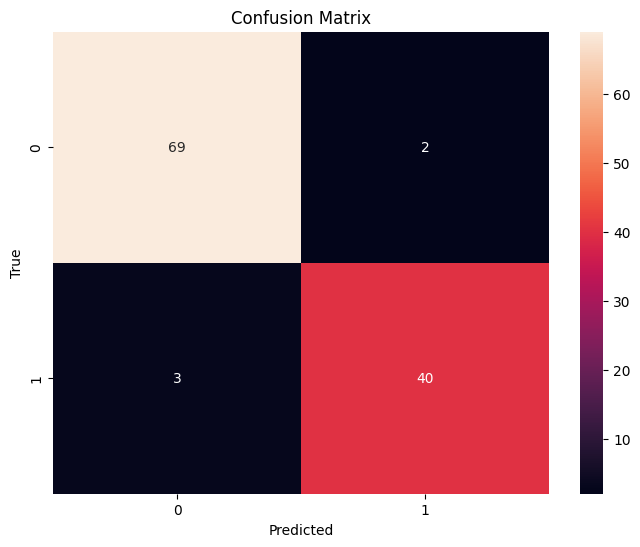

In [ ]:
# %% Gradient Boosting

model = train_model('Gradient Boosting', X_train, y_train, gradient_boosting_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 AdaBoostClassifier(learning_rate=1, n_estimators=150))])
Mean Squared Error: 0.0263
R^2 Score: 0.8880
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


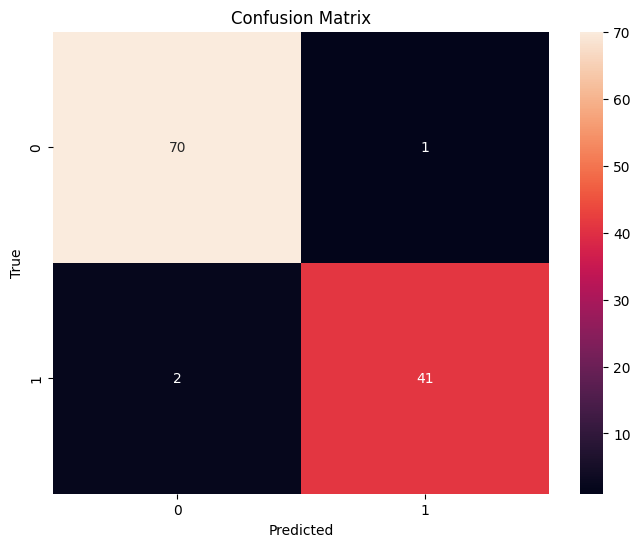

In [ ]:
# %% AdaBoost

model = train_model('AdaBoost', X_train, y_train, adaboost_grid)
evaluate_model(model, X_test, y_test)


Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', SGDClassifier(alpha=0.001, penalty='l1'))])
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-Score: 0.9647


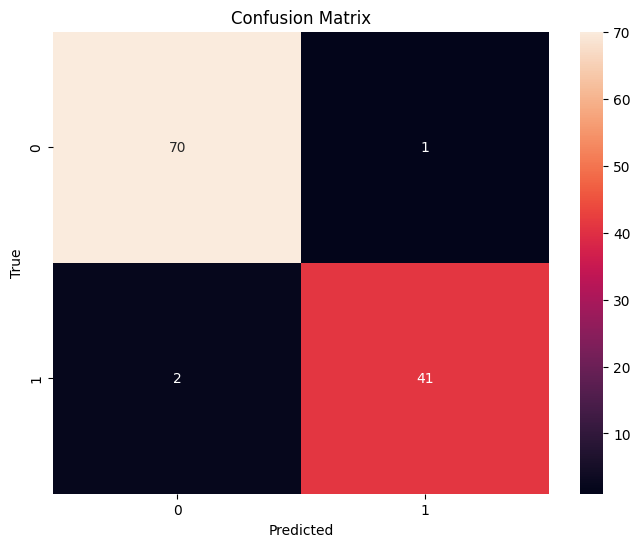

In [ ]:
# %% SGD Classifier

model = train_model('SGD Classifier', X_train, y_train, sgd_grid)
evaluate_model(model, X_test, y_test)